In [1]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
# Load libraries
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import pydotplus

from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
from io import StringIO

In [3]:
file_url = "https://raw.githubusercontent.com/samjurassic/datascience-demo/main/education/competition_data_v2.csv"
students = pd.read_csv(file_url)

students.describe()

index           age           gpa   days_missed     full_time  \
count  17000.000000  17000.000000  17000.000000  17000.000000  17000.000000   
mean    8514.909412     23.199579      2.987455      7.156176      0.631706   
std     4903.566301      4.124669      0.521384      5.978905      0.482356   
min        0.000000      5.905179      1.146199      0.000000      0.000000   
25%     4310.500000     20.392630      2.634031      2.000000      0.000000   
50%     8487.500000     23.265091      2.986107      4.000000      1.000000   
75%    12770.250000     25.975284      3.339473     12.000000      1.000000   
max    16999.000000     38.883769      5.038269     30.000000      1.000000   

           freshman  first_generation      employed    pell_grant  
count  17000.000000      17000.000000  17000.000000  17000.000000  
mean       0.623529          0.628647      0.532882      0.538000  
std        0.484514          0.483181      0.498932      0.498569  
min        0.000000          0.000000      0.000000      0.000000  
25%        0.000000          0.000000      0.000000      0.000000  
50%        1.000000          1.000000      1.000000      1.000000  
75%        1.000000          1.000000      1.000000      1.000000  
max        1.000000          1.000000      1.000000      1.000000

In [27]:
# recode DWFI as 0, P as 1
students["outcome"] = students.grade.apply(lambda x: int(x == "DWFI"))

# create dummy variables (0, 1) for borough and major
students_full = pd.get_dummies(students, columns=["borough", "major"], drop_first=True)
# students_full.columns

#split dataset in features and target variable
feature_cols = ['age', 'gpa', 'full_time', 'freshman', 'first_generation', 'employed',
       'pell_grant', 'borough_Brooklyn', 'borough_Manhattan',
       'borough_Outside NYC', 'borough_Queens', 'borough_Staten Island',
       'major_Computer Science']

X = students_full[feature_cols] # Features
y = students_full.outcome # Target variable

# Use train_test_split to split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=10) # 70% training and 30% test

In [30]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=8)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

### EVALUATE THE MODEL

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred),3))

# precision: true predicted positives/all predicted positives
print("Precision:", metrics.precision_score(y_test, y_pred).round(3))

# recall:  true predicted positives/all true positives
print("Recall:",metrics.recall_score(y_test, y_pred).round(3))

# Confusion Matrix
c_matrix = metrics.confusion_matrix(y_pred=y_pred, y_true=y_test)
print(c_matrix)

Accuracy: 0.742
Precision: 0.671
Recall: 0.627
[[6422 1489]
 [1804 3035]]


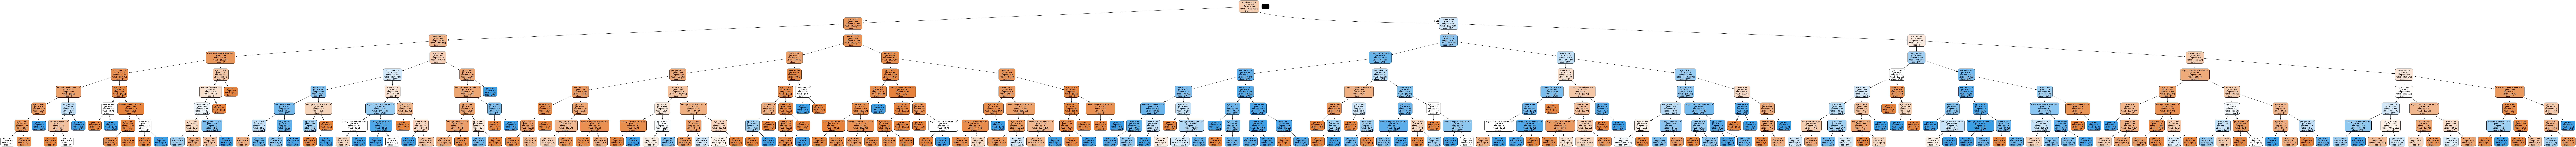

In [31]:
# graph decision tree
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['P','DWFI'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('students.png')
Image(graph.create_png())

In [33]:
### RANDOM FOREST

# Create Decision Tree classifer object
clf_rf = RandomForestClassifier(criterion="gini", max_depth=5, n_estimators=100)

# Train Decision Tree Classifer
clf_rf = clf_rf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_rf = clf_rf.predict(X_test)

### EVALUATE THE MODEL

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_rf),3))

# precision: true predicted positives/all predicted positives
print("Precision:", metrics.precision_score(y_test, y_pred_rf).round(3))

# recall:  true predicted positives/all true positives
print("Recall:",metrics.recall_score(y_test, y_pred_rf).round(3))

# Confusion Matrix
c_matrix = metrics.confusion_matrix(y_pred=y_pred_rf, y_true=y_test)
print(c_matrix)

Accuracy: 0.776
Precision: 0.755
Recall: 0.609
[[6955  956]
 [1894 2945]]


In [34]:
### GRADIENT BOOSTING

# Create Decision Tree classifer object
clf_gb = GradientBoostingClassifier(max_depth=5, n_estimators=100, learning_rate=0.05, verbose=True)

# Train Decision Tree Classifer
clf_gb = clf_gb.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_gb = clf_gb.predict(X_test)

### EVALUATE THE MODEL

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", round(metrics.accuracy_score(y_test, y_pred_gb),3))

# precision: true predicted positives/all predicted positives
print("Precision:", metrics.precision_score(y_test, y_pred_gb).round(3))

# recall:  true predicted positives/all true positives
print("Recall:", metrics.recall_score(y_test, y_pred_gb).round(3))

# Confusion Matrix
c_matrix = metrics.confusion_matrix(y_pred=y_pred_gb, y_true=y_test)
print(c_matrix)

      Iter       Train Loss   Remaining Time 
         1           1.2897            8.22s
         2           1.2587            8.56s
         3           1.2310            7.20s
         4           1.2060            6.45s
         5           1.1826            6.31s
         6           1.1611            5.94s


         7           1.1415            5.90s
         8           1.1231            5.84s
         9           1.1062            5.75s
        10           1.0898            5.72s
        20           0.9732            3.96s
        30           0.9060            3.16s
        40           0.8604            3.07s
        50           0.8254            2.35s
        60           0.7987            1.71s
        70           0.7773            1.40s
        80           0.7588            0.90s
        90           0.7413            0.43s
       100           0.7278            0.00s
Accuracy: 0.775
Precision: 0.732
Recall: 0.642
[[6775 1136]
 [1732 3107]]


In [35]:
### Compare AUC

## NOTE: You need predicted probabilities to do this - not predicted classes

print(f"Decision tree: {round(metrics.roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]), 4)}")
print(f"Random forest: {round(metrics.roc_auc_score(y_test, clf_rf.predict_proba(X_test)[:,1]), 4)}")
print(f"Gradient boosting: {round(metrics.roc_auc_score(y_test, clf_gb.predict_proba(X_test)[:,1]), 4)}")


Decision tree: 0.7825
Random forest: 0.8467
Gradient boosting: 0.8442


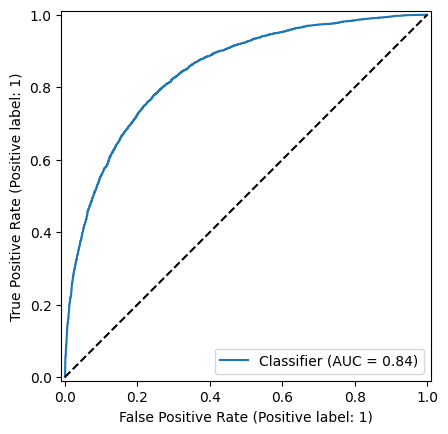

In [36]:
# Plot the ROC curve
display = metrics.RocCurveDisplay.from_predictions(
    y_true=y_test,
    y_pred=clf_gb.predict_proba(X_test)[:,1]
)

# plot the dashed line to show a random model (BAD, as if coin flip)
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')

In [37]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
import numpy as np

param_grid = {
    # "loss":["log_loss", "exponential"],
    "max_depth":[8],
    "learning_rate": [0.01, 0.5],
    "subsample":[0.10],
    "n_estimators":[50, 100, 150]
    # "min_samples_split": np.linspace(0.1, 0.5, 12),
    # "min_samples_leaf": np.linspace(0.1, 0.5),
    # "max_features":["log2","sqrt"],
    # "criterion": ["friedman_mse",  "mae"],

    }

gbt = GradientBoostingClassifier(random_state=8, verbose=False)

# cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=0)

search = GridSearchCV(estimator=gbt, param_grid=param_grid, scoring="roc_auc", cv=None)
search.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=8,
                                                  verbose=False),
             param_grid={'learning_rate': [0.01, 0.5], 'max_depth': [8],
                         'n_estimators': [50, 100, 150], 'subsample': [0.1]},
             scoring='roc_auc')

In [38]:
results_df = pd.DataFrame(search.cv_results_)
results_df = results_df.sort_values(by=["rank_test_score"])

# pd.concat([results_df.drop(columns="params"), results_df["params"].apply(pd.Series)])
print(search.best_params_)

# results_df = results_df.set_index(
#     results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
# ).rename_axis("kernel")
results_df[["param_learning_rate", "param_max_depth", "param_n_estimators", "param_subsample", "rank_test_score", "mean_test_score", "std_test_score"]]

{'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 150, 'subsample': 0.1}


param_learning_rate param_max_depth param_n_estimators param_subsample  \
2                0.01               8                150             0.1   
1                0.01               8                100             0.1   
0                0.01               8                 50             0.1   
4                 0.5               8                100             0.1   
3                 0.5               8                 50             0.1   
5                 0.5               8                150             0.1   

   rank_test_score  mean_test_score  std_test_score  
2                1         0.849826        0.011725  
1                2         0.846568        0.012952  
0                3         0.841289        0.013917  
4                4         0.595880        0.087967  
3                5         0.593688        0.080802  
5                6         0.587563        0.090423

In [39]:
### GRADIENT BOOSTING

# Create Decision Tree classifer object
clf_gb = GradientBoostingClassifier(**search.best_params_)

# Train Decision Tree Classifer
clf_gb = clf_gb.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_gb = clf_gb.predict(X_test)

### EVALUATE THE MODEL

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", round(metrics.accuracy_score(y_test, y_pred_gb),3))

# precision: true predicted positives/all predicted positives
print("Precision:", metrics.precision_score(y_test, y_pred_gb).round(3))

# recall:  true predicted positives/all true positives
print("Recall:", metrics.recall_score(y_test, y_pred_gb).round(3))

# Confusion Matrix
c_matrix = metrics.confusion_matrix(y_pred=y_pred_gb, y_true=y_test)
print(c_matrix)

print(f"Gradient boosting: {round(metrics.roc_auc_score(y_test, clf_gb.predict_proba(X_test)[:,1]), 4)}")

Accuracy: 0.777
Precision: 0.752
Recall: 0.613
[[6934  977]
 [1871 2968]]
Gradient boosting: 0.8436


In [40]:
param_grid_rf = {
    "max_depth":[2, 5, 8, 10],
    "n_estimators":[100, 150, 200, 250],
    "min_impurity_decrease": [0.01, 0.03],
    # "min_samples_split": np.linspace(0.1, 0.5, 12),
    # "min_samples_leaf": np.linspace(0.1, 0.5),
    # "max_features":["log2","sqrt"],
    # "criterion": ["friedman_mse",  "mae"],
}

rf_grid = RandomForestClassifier(criterion="gini", random_state=8)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=0)

search_rf = GridSearchCV(estimator=rf_grid, param_grid=param_grid_rf, scoring="roc_auc", cv=cv)
search_rf.fit(X_train, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=1, n_splits=5, random_state=0),
             estimator=RandomForestClassifier(random_state=8),
             param_grid={'max_depth': [2, 5, 8, 10],
                         'min_impurity_decrease': [0.01, 0.03],
                         'n_estimators': [100, 150, 200, 250]},
             scoring='roc_auc')

In [41]:
results_rf = pd.DataFrame(search_rf.cv_results_)
results_rf = results_rf.sort_values(by=["rank_test_score"])

print(search_rf.best_params_)

results_rf[["param_min_impurity_decrease", "param_max_depth", "param_n_estimators", "rank_test_score", "mean_test_score", "std_test_score"]]

{'max_depth': 2, 'min_impurity_decrease': 0.01, 'n_estimators': 250}


param_min_impurity_decrease param_max_depth param_n_estimators  \
3                         0.01               2                250   
1                         0.01               2                150   
2                         0.01               2                200   
19                        0.01               8                250   
27                        0.01              10                250   
11                        0.01               5                250   
0                         0.01               2                100   
25                        0.01              10                150   
17                        0.01               8                150   
9                         0.01               5                150   
24                        0.01              10                100   
16                        0.01               8                100   
8                         0.01               5                100   
26                        0.01              10                200   
18                        0.01               8                200   
10                        0.01               5                200   
31                        0.03              10                250   
23                        0.03               8                250   
15                        0.03               5                250   
7                         0.03               2                250   
22                        0.03               8                200   
14                        0.03               5                200   
30                        0.03              10                200   
6                         0.03               2                200   
29                        0.03              10                150   
21                        0.03               8                150   
13                        0.03               5                150   
5                         0.03               2                150   
12                        0.03               5                100   
4                         0.03               2                100   
20                        0.03               8                100   
28                        0.03              10                100   

    rank_test_score  mean_test_score  std_test_score  
3                 1         0.828157        0.014006  
1                 2         0.827172        0.014778  
2                 3         0.827119        0.014051  
19                4         0.826924        0.014244  
27                4         0.826924        0.014244  
11                6         0.826912        0.014263  
0                 7         0.826771        0.016210  
25                8         0.826293        0.014995  
17                8         0.826293        0.014995  
9                10         0.826253        0.015054  
24               11         0.826201        0.016213  
16               11         0.826201        0.016213  
8                13         0.826152        0.016278  
26               14         0.825979        0.014532  
18               14         0.825979        0.014532  
10               16         0.825973        0.014541  
31               17         0.791359        0.015855  
23               17         0.791359        0.015855  
15               17         0.791359        0.015855  
7                20         0.791148        0.016120  
22               21         0.788392        0.017570  
14               21         0.788392        0.017570  
30               21         0.788392        0.017570  
6                24         0.788253        0.017688  
29               25         0.784681        0.019156  
21               25         0.784681        0.019156  
13               25         0.784681        0.019156  
5                28         0.784491        0.019295  
12               29         0.780280        0.020750  
4                29         0.780280        0.020750  
20               29 

<Axes: xlabel='param_max_depth', ylabel='mean_test_score'>

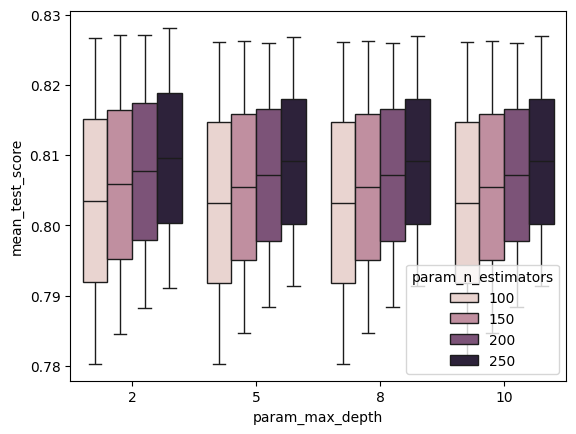

In [42]:
sns.boxplot(results_rf, x="param_max_depth", y="mean_test_score", hue="param_n_estimators")

In [43]:
### RANDOM FOREST

# Create Decision Tree classifer object
clf_rf = RandomForestClassifier(**search_rf.best_params_)

# Train Decision Tree Classifer
clf_rf = clf_rf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_rf = clf_rf.predict(X_test)

### EVALUATE THE MODEL

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_rf),3))

# precision: true predicted positives/all predicted positives
print("Precision:", metrics.precision_score(y_test, y_pred_rf).round(3))

# recall:  true predicted positives/all true positives
print("Recall:",metrics.recall_score(y_test, y_pred_rf).round(3))

# Confusion Matrix
c_matrix = metrics.confusion_matrix(y_pred=y_pred_rf, y_true=y_test)
print(c_matrix)

Accuracy: 0.704
Precision: 0.839
Recall: 0.274
[[7656  255]
 [3513 1326]]


In [44]:
def get_comp_test_data():

  comp_test_fn = "https://raw.githubusercontent.com/samjurassic/datascience-demo/main/education/competition_data_test_v2.csv"

  comp_test = pd.read_csv(comp_test_fn, index_col="index")

  # create dummy variables (0, 1) for borough and major
  comp_full = pd.get_dummies(comp_test, columns=["borough", "major"], drop_first=True)
  # students_full.columns

  #split dataset in features and target variable
  feature_cols = ['age', 'gpa', 'full_time', 'freshman', 'first_generation', 'employed',
        'pell_grant', 'borough_Brooklyn', 'borough_Manhattan',
        'borough_Outside NYC', 'borough_Queens', 'borough_Staten Island',
        'major_Computer Science']

  return comp_full

comp_X = get_comp_test_data()

def make_predictions_df(model, X, features):
  probs = model.predict_proba(X[features])[:,1]
  return pd.DataFrame(probs, index=X.index.values, columns=["outcome"])

output_df = make_predictions_df(clf_rf, comp_X, feature_cols)

# check output
assert len(output_df) == 17000
assert output_df.index[-1] == 16998
assert output_df.columns[0] == "outcome"

output_df.to_csv("ye_moe_predictions_rf2.csv", index=True)